# Understanding poverty and hunger in India

- Identifying common causes to both problems
- Ranking those causes by studying their respective impacts
- Proposing pertinent solutions 

This work aims to gather information on the evolution of hunger and poverty in India during the last twenty years, and then propose measures to meet the challenges proposed by the UN.

## Goals: 
1. No poverty
2. Zero hunger

## Solution domains:
- Agroindustry
- Climate and environment
- Energy
- Food and poverty

In [ ]:
#libraries 
from google.colab import drive
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

drive.mount('ML-IMD/')

Drive already mounted at ML-IMD/; to attempt to forcibly remount, call drive.mount("ML-IMD/", force_remount=True).


In [19]:
# Reading csv files
data = read_csv('/content/ML-IMD/My Drive/FAOSTAT_data_9-21-2020.csv')

In [ ]:
data['Item']

0     Number of people undernourished (million) (3-y...
1     Number of people undernourished (million) (3-y...
2     Number of people undernourished (million) (3-y...
3     Number of people undernourished (million) (3-y...
4     Number of people undernourished (million) (3-y...
5     Number of people undernourished (million) (3-y...
6     Number of people undernourished (million) (3-y...
7     Number of people undernourished (million) (3-y...
8     Number of people undernourished (million) (3-y...
9     Number of people undernourished (million) (3-y...
10    Number of people undernourished (million) (3-y...
11    Number of people undernourished (million) (3-y...
12    Number of people undernourished (million) (3-y...
13    Number of people undernourished (million) (3-y...
14    Number of people undernourished (million) (3-y...
15    Number of people undernourished (million) (3-y...
16    Number of people undernourished (million) (3-y...
17    Number of people undernourished (million) 

## Target 2.1

According to UN's website:
*By 2030, end hunger and ensure access by all people, in particular the poor and people in vulnerable situations, including infants, to safe, nutritious and sufficient food all year round*

The indicator used is the undernourishment, which means having insufficient food or other substances for good health and condition.




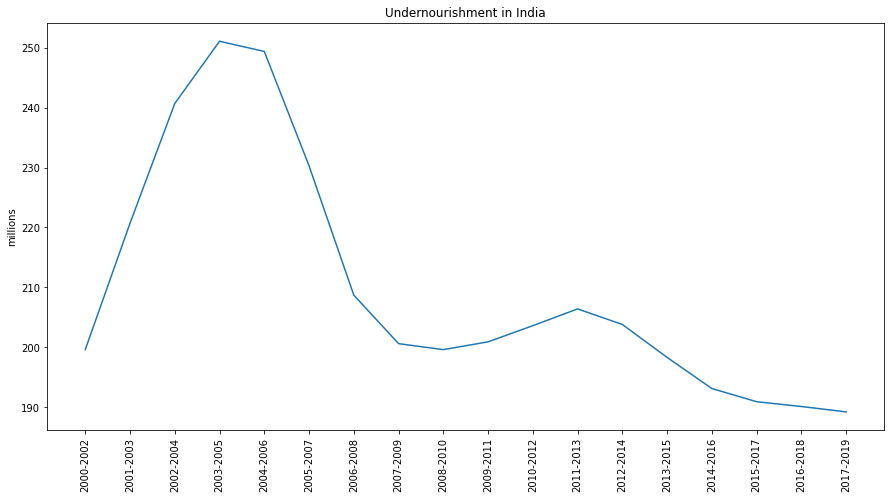

In [ ]:

years = data["Year"]
plt.figure(figsize=(15,7.5))
plt.plot(range(years.size), data["Value"])
plt.title("Undernourishment in India")
plt.xticks(range(years.size), years, rotation = 90)
plt.ylabel("millions")
plt.show()


Let's try to obtain a model for the undernourishment evolution through a linear regression. This model will use data starting at 2013, when the last undernourishment peak is already over.

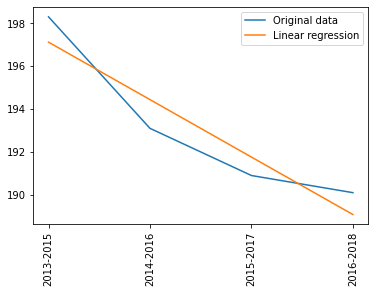

Linear regression model:
 
-2.68 x + 197.1


In [ ]:
from numpy import polyfit, poly1d

year_range = years[13:17]
data_range = data["Value"][13:17]
x = range(year_range.size)
y = data_range
deg = 1

p = poly1d(polyfit(x, y, deg))
plt.plot(x, y, label = 'Original data')
plt.plot(x, p(x), label = 'Linear regression')
plt.xticks(x, year_range, rotation = 90)
plt.legend()
plt.show()
print("Linear regression model:")
print(p)

Now, with our linear model, let's see a new graph with the undernourishment values until 2030:

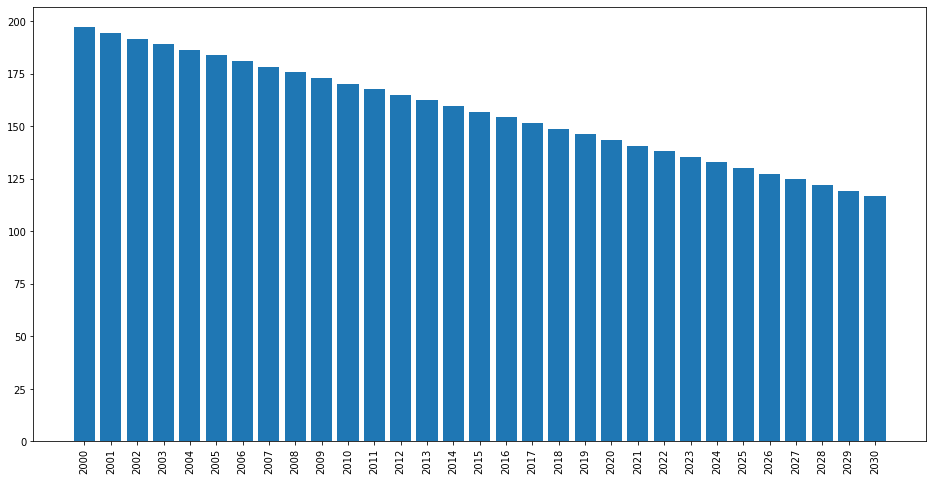

Undernourishment by 2030: 116.72000000000001 millions


In [ ]:
x = range(0, 31)
ticks = [str(2000 + i) for i in x]
#plt.plot(x, p(x))
plt.figure(figsize=(16,8))
plt.bar(x, p(x))
plt.xticks(x, ticks, rotation = 90)
plt.show()

print("Undernourishment by 2030: " + str(p(30)) + " millions")



Following the model, we can estimate that there will be still about 120 million undernourished people by 2030, and the Target 2.1 won't be achieved.


# Target 1.2

According to UN's website: *By 2030, reduce at least by half the proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions*



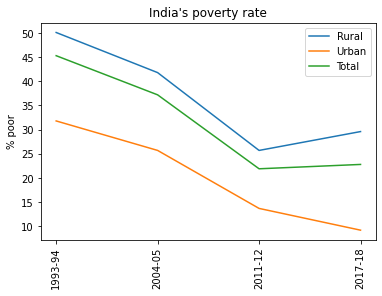

In [20]:
data = read_csv('/content/ML-IMD/My Drive/data-7mtoz.csv')
years = data["Year"]
plt.plot(range(years.size), data['Rural'], label='Rural')
plt.plot(range(years.size), data['Urban'], label='Urban')
plt.plot(range(years.size), data['Total'], label='Total')
plt.legend()
plt.title("India's poverty rate")
plt.xticks(range(years.size), years, rotation = 90)
plt.ylabel("% poor")
plt.show()

As we did before, let's propose a linear model to fit the Total curve:

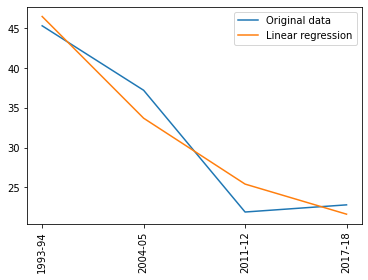

Linear regression model:
      2
2.25 x - 15.03 x + 46.47


In [21]:
x = range(years.size)
y = data['Total']
deg = 2

p = poly1d(polyfit(x, y, deg))
plt.plot(x, y, label = 'Original data')
plt.plot(x, p(x), label = 'Linear regression')
plt.xticks(range(years.size), years, rotation = 90)
plt.legend()
plt.show()
print("Linear regression model:")
print(p)

The original data has a time range from 1993 until 2018 (i.e. 25 years span) and only 4 samples. We will estimate samples from 1993 until 2030 considering a step of 6 years.

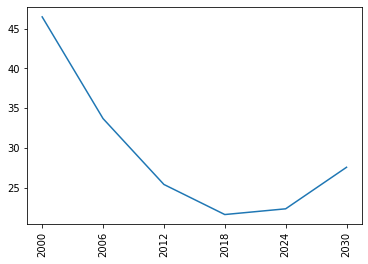

Poverty rate by 2030: 27.570000000000014%


In [22]:
x = range(0, 6)
ticks = [str(2000 + i*6) for i in x]
plt.plot(x, p(x))
plt.xticks(x, ticks, rotation = 90)
plt.show()

print("Poverty rate by 2030: " + str(p(5)) + "%")

### The main objective is to look for whether there is any relationship between emissions of gases harmful to the environment, burning, and poulational changes

It is important to note that both graphs tend to give harmful results to the Indian population after 2015

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
dfpoor = pd.read_csv('data-7mtoz.csv')
dfpoor

,Year,Rural,Urban,Total
0,1993-94,50.1,31.8,45.3
1,2004-05,41.8,25.7,37.2
2,2011-12,25.7,13.7,21.9
3,2017-18,29.6,9.2,22.8


###### Dataframe sobre população indiana de 2000 a 2019

In [27]:
popu = pd.read_csv('population.csv')
popu

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Note
0,OA,Annual population,100,India,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1998,1998,1000 persons,1019483.581,NaN
1,OA,Annual population,100,India,512,Total Population - Male,3010,Population - Est. & Proj.,1998,1998,1000 persons,529954.039,NaN
2,OA,Annual population,100,India,513,Total Population - Female,3010,Population - Est. & Proj.,1998,1998,1000 persons,489529.547,NaN
3,OA,Annual population,100,India,551,Rural population,3010,Population - Est. & Proj.,1998,1998,1000 persons,739222.779,NaN
4,OA,Annual population,100,India,561,Urban population,3010,Population - Est. & Proj.,1998,1998,1000 persons,276751.263,"UNDESA, Population Division – World Urbanizati..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,OA,Annual population,100,India,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,1352642.280,NaN
101,OA,Annual population,100,India,512,Total Population - Male,3010,Population - Est. & Proj.,2018,2018,1000 persons,703055.580,NaN
102,OA,Annual population,100,India,513,Total Population - Female,3010,Population - Est. & Proj.,2018,2018,1000 persons,649586.703,NaN
103,OA,Annual population,100,India,551,Rural population,3010,Population - Est. & Proj.,2018,2018,1000 persons,893272.090,NaN


In [30]:
employ = pd.read_csv('employ-indicators.csv')
employ.head(10)

,Domain Code,Domain,Area Code,Area,Indicator Code,Indicator,Source Code,FAO Source,Year Code,Year,Unit,Value,Note
0,OE,Employment Indicators,100,India,21084,"Agriculture value added per worker (US$, 2010 ...",3022,Household survey,2000,2000,US$,1096.2890,Source: FAO and ILOSTAT
1,OE,Employment Indicators,100,India,21084,"Agriculture value added per worker (US$, 2010 ...",3022,Household survey,2005,2005,US$,1196.1250,Source: FAO and ILOSTAT
2,OE,Employment Indicators,100,India,21084,"Agriculture value added per worker (US$, 2010 ...",3022,Household survey,2010,2010,US$,1492.7800,Source: FAO and ILOSTAT
3,OE,Employment Indicators,100,India,21084,"Agriculture value added per worker (US$, 2010 ...",3022,Household survey,2012,2012,US$,1704.1070,Source: FAO and ILOSTAT
4,OE,Employment Indicators,100,India,21066,Employment in agriculture,3023,Labour force survey,2018,2018,1000 persons,156232.2500,Repository: ILO-STATISTICS - Micro data proces...
5,OE,Employment Indicators,100,India,21064,"Employment in agriculture, female",3023,Labour force survey,2018,2018,1000 persons,43015.7090,Repository: ILO-STATISTICS - Micro data proces...
6,OE,Employment Indicators,100,India,21065,"Employment in agriculture, male",3023,Labour force survey,2018,2018,1000 persons,113208.2600,Repository: ILO-STATISTICS - Micro data proces...
7,OE,Employment Indicators,100,India,21069,"Employment-to-population ratio, rural areas",3023,Labour force survey,2018,2018,%,46.3820,Repository: ILO-STATISTICS - Micro data proces...
8,OE,Employment Indicators,100,India,21067,"Employment-to-population ratio, rural areas, f...",3023,Labour force survey,2018,2018,%,20.8696,Repository: ILO-STATISTICS - Micro data proces...
9,OE,Employment Indicators,100,India,21068,"Employment-to-population ratio, rural areas, male",3023,Labour force survey,2018,2018,%,71.4017,Repository: ILO-STATISTICS - Micro data proces...


In [36]:
burned = pd.read_csv('burning.csv')
burned

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Value
0,GI,Burning - Biomass,100,India,7246,Burned Area,6796,Humid tropical forest,2000,2000,58209.9843
1,GI,Burning - Biomass,100,India,7246,Burned Area,6796,Humid tropical forest,2001,2001,61521.1777
2,GI,Burning - Biomass,100,India,7246,Burned Area,6796,Humid tropical forest,2002,2002,26853.8009
3,GI,Burning - Biomass,100,India,7246,Burned Area,6796,Humid tropical forest,2003,2003,153609.7514
4,GI,Burning - Biomass,100,India,7246,Burned Area,6796,Humid tropical forest,2004,2004,256645.9178
...,...,...,...,...,...,...,...,...,...,...,...
511,GI,Burning - Biomass,100,India,723111,Emissions (CO2eq) (Burning biomass),6726,Organic soils,2013,2013,36.6936
512,GI,Burning - Biomass,100,India,723111,Emissions (CO2eq) (Burning biomass),6726,Organic soils,2014,2014,83.3946
513,GI,Burning - Biomass,100,India,723111,Emissions (CO2eq) (Burning biomass),6726,Organic soils,2015,2015,76.7229
514,GI,Burning - Biomass,100,India,723111,Emissions (CO2eq) (Burning biomass),6726,Organic soils,2016,2016,330.2439


In [68]:
emissions = pd.read_csv('emissions.csv')
emissions.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EM,Emissions shares,100,India,726312,Share of total emissions (SAR),1711,Agriculture total,2000,2000,%,29.2306,A,"Aggregate, may include official, semi-official..."
1,EM,Emissions shares,100,India,726312,Share of total emissions (SAR),1711,Agriculture total,2001,2001,%,29.3184,A,"Aggregate, may include official, semi-official..."
2,EM,Emissions shares,100,India,726312,Share of total emissions (SAR),1711,Agriculture total,2002,2002,%,28.4757,A,"Aggregate, may include official, semi-official..."
3,EM,Emissions shares,100,India,726312,Share of total emissions (SAR),1711,Agriculture total,2003,2003,%,28.0862,A,"Aggregate, may include official, semi-official..."
4,EM,Emissions shares,100,India,726312,Share of total emissions (SAR),1711,Agriculture total,2004,2004,%,27.3672,A,"Aggregate, may include official, semi-official..."


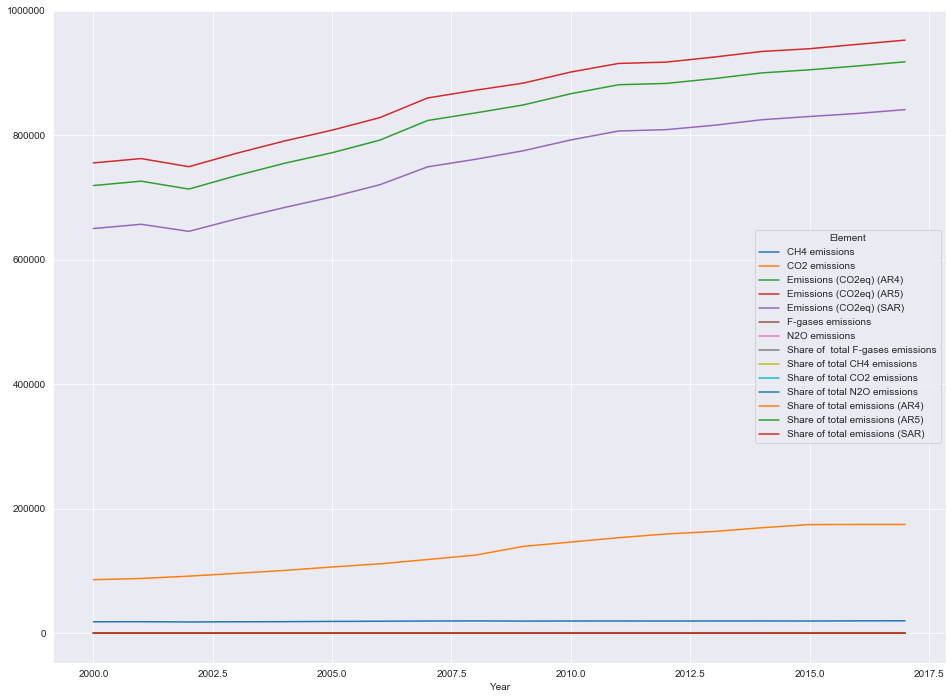

In [81]:
pivot_emissions = emissions.pivot_table(index='Year', columns='Element', values='Value'
                            , aggfunc='sum')
pivot_emissions.plot(kind='line', figsize=(16,12))

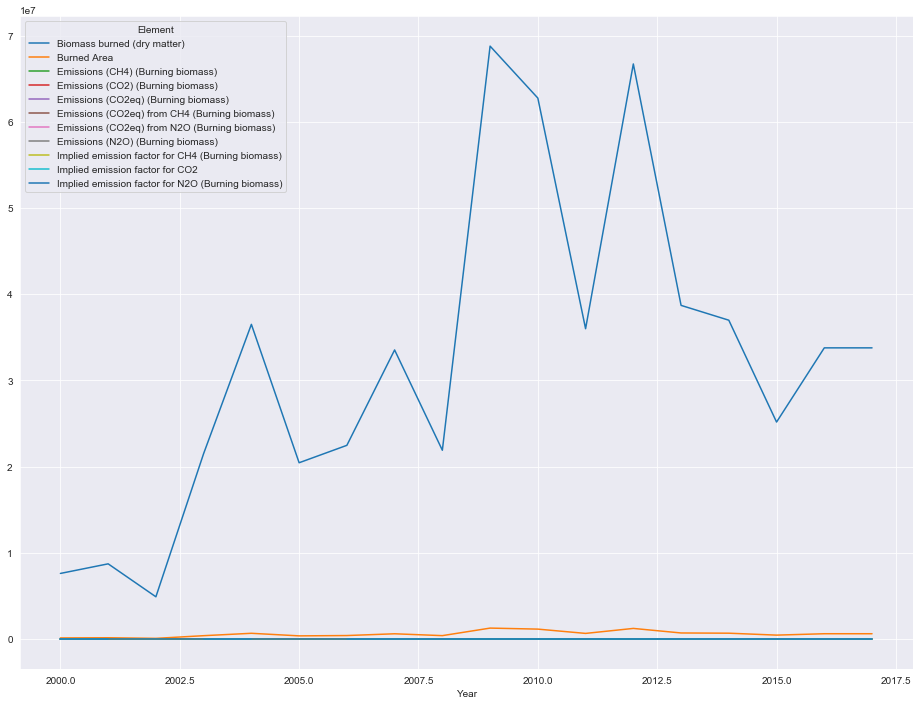

In [83]:
pivot_burned = burned.pivot_table(index='Year', columns='Element', values='Value'
                            , aggfunc='sum')
pivot_burned.plot(kind='line', figsize=(16,12))

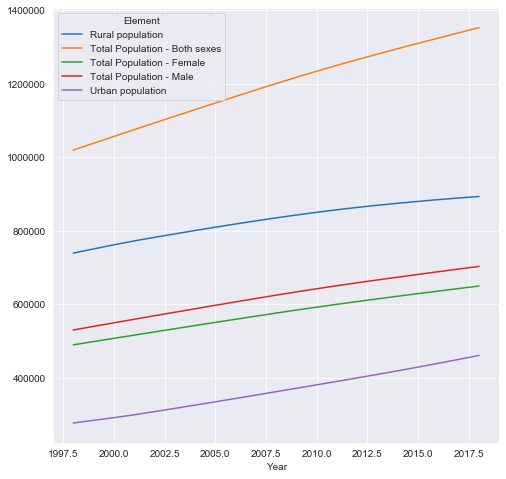

In [84]:
pivot_popu = popu.pivot_table(index='Year', columns='Element', values='Value'
                            , aggfunc='sum')
pivot_popu.plot(kind='line', figsize=(8,8))

Visually it is possible to notice that all the graphics present in the notebook have major changes after 2015

It is necessary to combine these data to have a better precision and to be able to predict possible scenarios

In [88]:
newdf = pd.concat([pivot_popu, pivot_emissions, pivot_burned], axis = 1)
newdf

Element,Rural population,Total Population - Both sexes,Total Population - Female,Total Population - Male,Urban population,CH4 emissions,CO2 emissions,Emissions (CO2eq) (AR4),Emissions (CO2eq) (AR5),Emissions (CO2eq) (SAR),...,Burned Area,Emissions (CH4) (Burning biomass),Emissions (CO2) (Burning biomass),Emissions (CO2eq) (Burning biomass),Emissions (CO2eq) from CH4 (Burning biomass),Emissions (CO2eq) from N2O (Burning biomass),Emissions (N2O) (Burning biomass),Implied emission factor for CH4 (Burning biomass),Implied emission factor for CO2,Implied emission factor for N2O (Burning biomass)
Year,,,,,,,,,,,,,,,,,,,,,
1998,739222.779,1019483.581,489529.547,529954.039,276751.263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,750527.571,1038058.156,498372.774,539685.380,284011.643,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,761700.630,1056575.549,507187.684,549387.864,291350.282,18281.8171,85904.6363,718904.2063,755304.2123,649854.9573,...,1.410871e+05,51.5006,8.7037,1566.2324,1081.5122,476.0164,1.5355,34.3114,1703.0000,0.6025
2001,772339.048,1075000.085,515957.249,559042.845,299138.807,18360.6780,87793.5637,725949.1358,762233.0810,656712.6771,...,1.622626e+05,58.6188,1.2904,1780.6783,1230.9945,548.3934,1.7689,34.2468,1702.9922,0.6023
2002,782001.968,1093317.189,524676.537,568640.650,307805.144,17987.2280,91587.2588,713247.9325,749196.0152,645321.0326,...,9.153046e+04,32.7028,0.0000,998.2994,686.7597,311.5397,1.0050,13.3881,NaN,0.4074
2003,791442.579,1111523.144,533346.647,578176.499,316585.269,18252.2404,96105.5575,734899.5891,770784.2889,665386.7897,...,4.018131e+05,141.0785,21.9373,4369.0874,2962.6489,1384.5012,4.4661,33.9747,1702.9922,0.6105
2004,800652.720,1129623.456,541973.982,587649.484,325483.057,18464.1033,100682.7542,754636.5702,790402.8447,683608.3947,...,6.790770e+05,243.6525,2.5809,7427.7753,5116.7028,2308.4916,7.4468,34.1945,1702.9922,0.6045
2005,809639.268,1147609.927,550557.711,597052.213,334479.406,18860.7588,106277.4318,771627.2203,807883.4113,700633.7481,...,3.806757e+05,136.3979,0.0000,4159.2785,2864.3564,1294.9221,4.1771,13.3829,NaN,0.4072
2006,818387.902,1165486.291,559099.816,606386.475,343589.817,19139.7888,111285.7547,791855.4988,828019.3323,720185.9419,...,4.176507e+05,150.6843,6.4521,4586.4112,3164.3721,1415.5871,4.5665,34.2029,1702.9922,0.6042


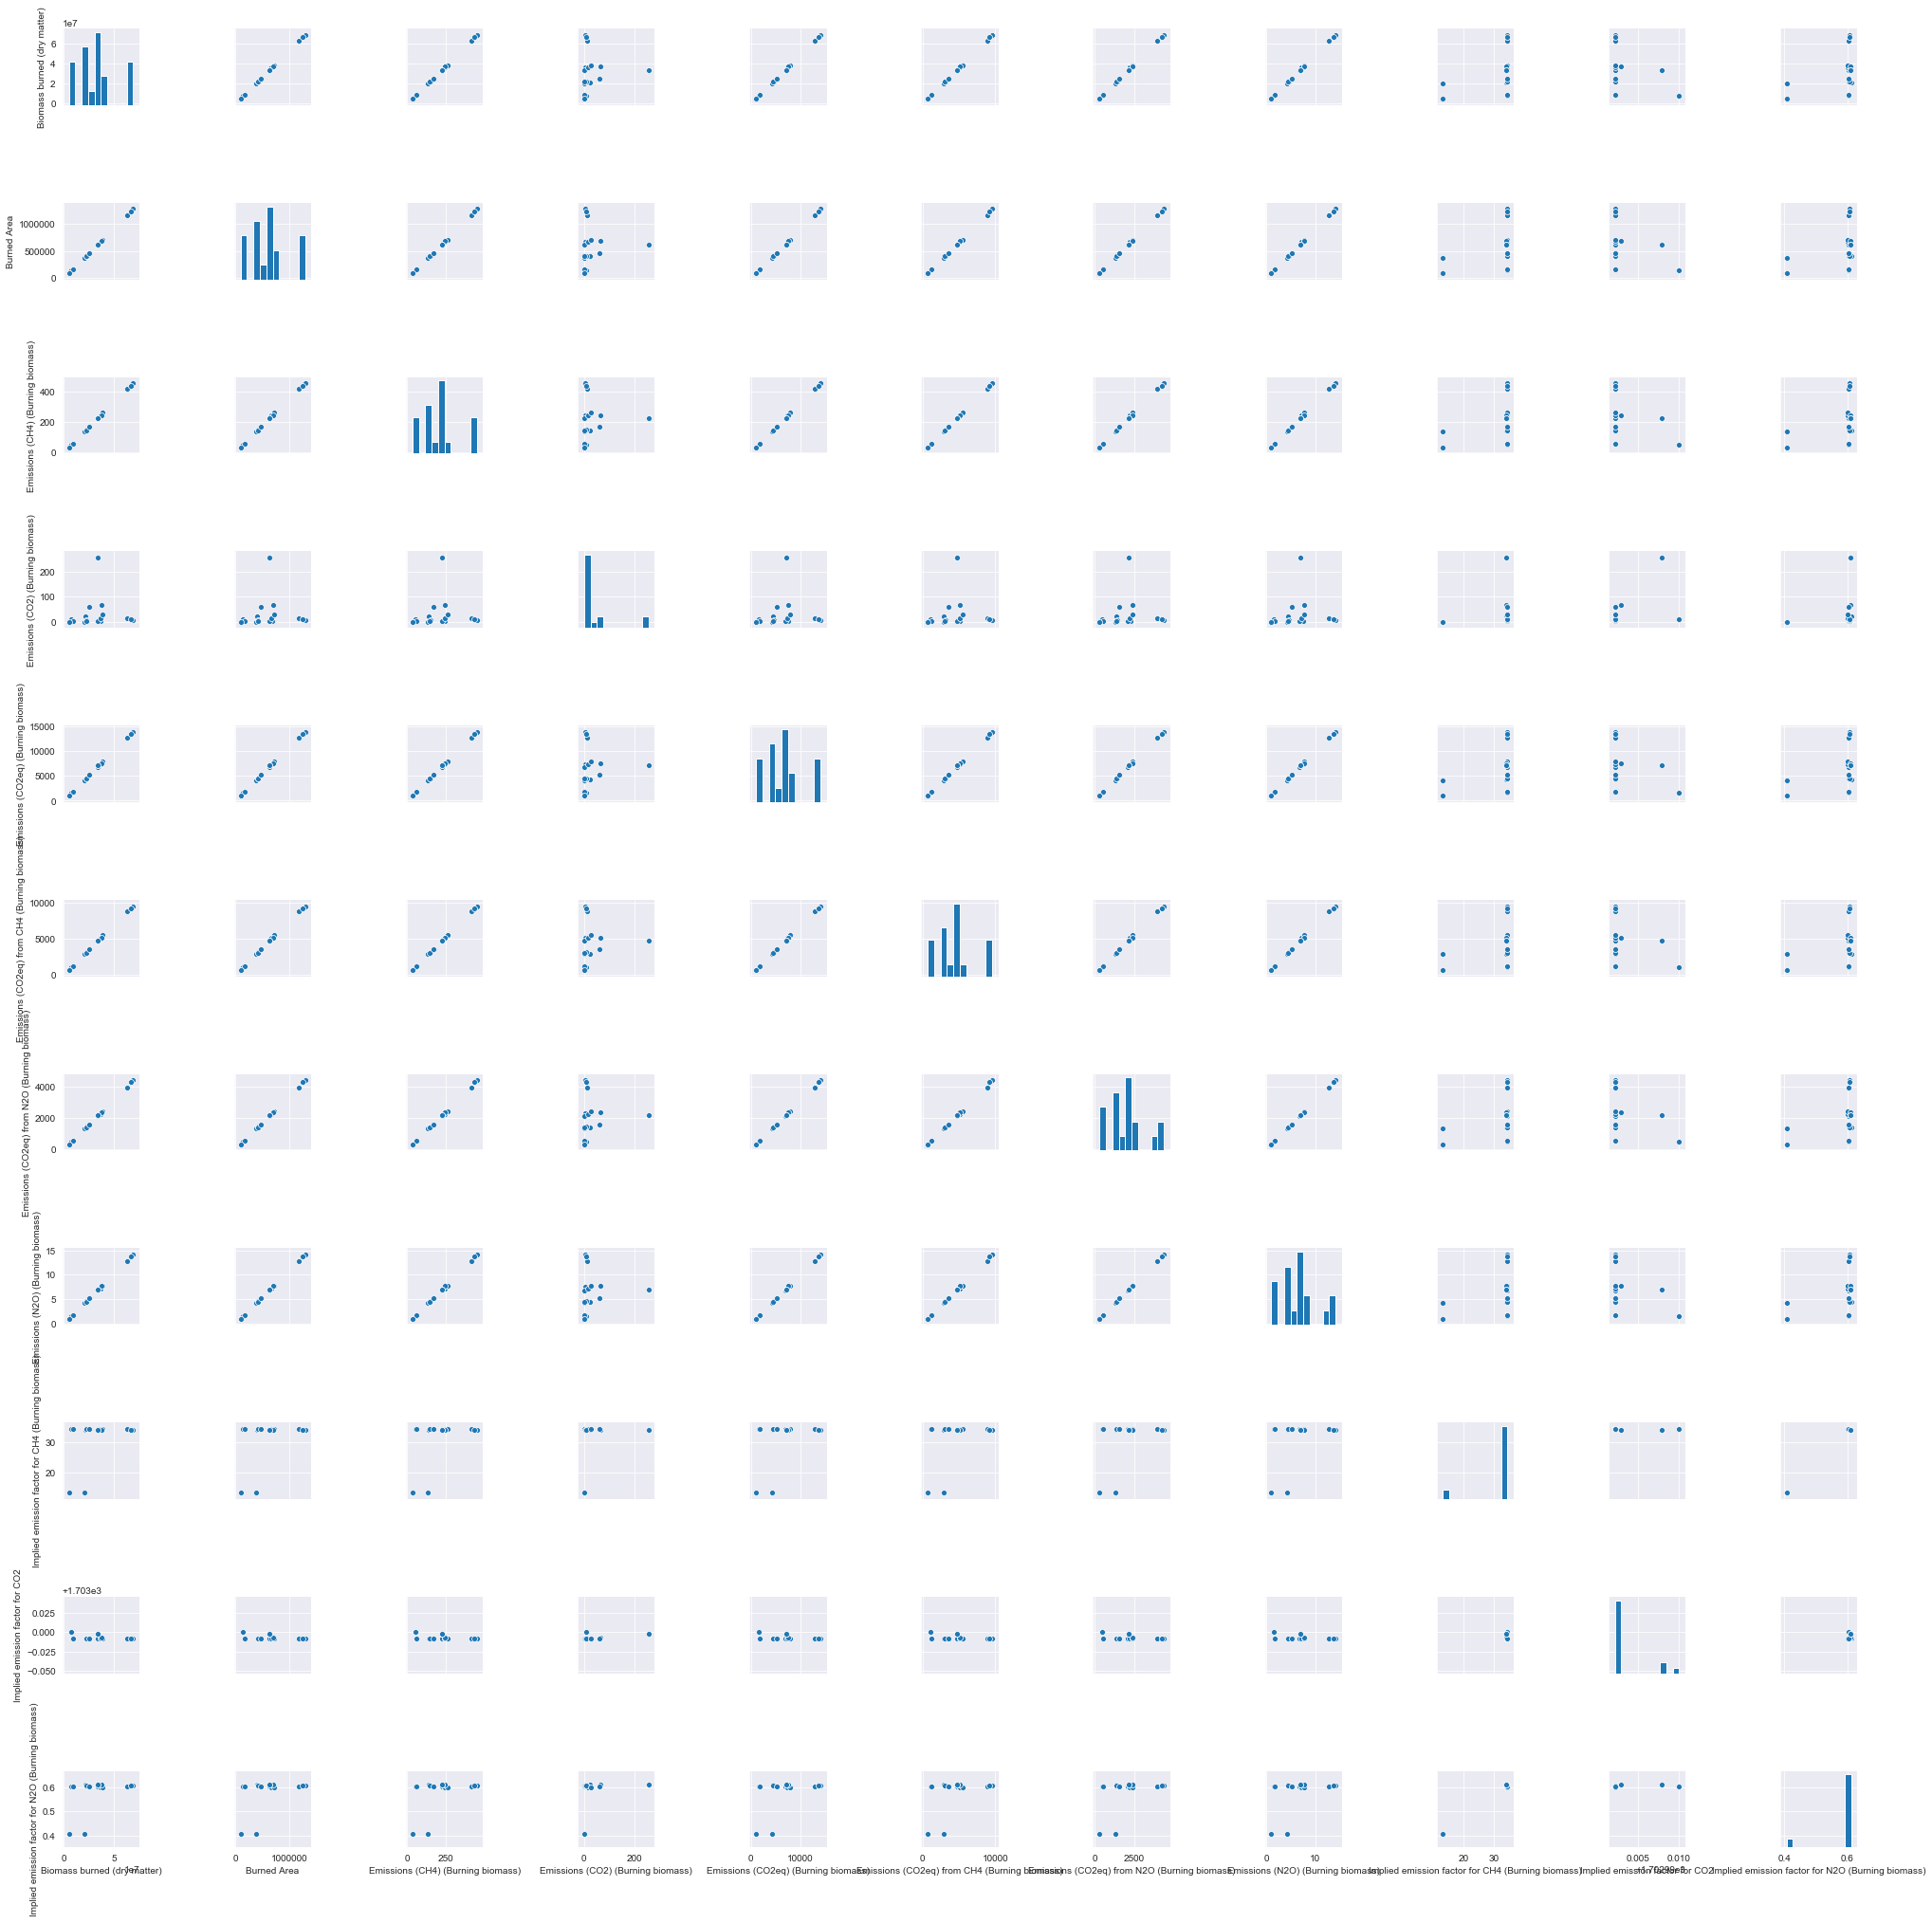

In [91]:
sns.pairplot(pivot_burned)